# Hierarchical clustering

Hierarchiacal clustering approaches the problem from a bottom-up approach. Each data point initially belong to its own cluster. The algorithm then iteratively merge two clusters with highest similarity measure, until the desired number of cluster is acheived. Different similarity measures give rise to different clustering results. Some common similarity measures include

1. Complete-linkage clustering: $d(A, B) = \max_{a\in A, b\in B} d(a, b)$
2. Single-linkage clustering: $d(A, B) = \min_{a\in A, b\in B} d(a, b)$
3. Unweighted average linkage clustering: $d(A, B) = \frac{1}{|A||B|}\sum_{a\in A}\sum_{b\in B} d(a, b)$
4. Centroid linkage clustering: $d(A, B) = ||\mu_A-\mu_B||_2^2$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [79]:
class HierarchicalClustering:
    
    def __init__(self, n_cluster, metric):
        self.k = n_cluster
        self.metric = metric
        self.distance = None
        
    def fit(self, X):
        X = X[:, np.newaxis, :].tolist()
        while len(X) > self.k:
            X = self.update(X)
        points, labels = [], []
        for cluster_label, cluster in enumerate(X):
            for point in cluster:
                points.append(point)
                labels.append(cluster_label)
        return np.array(points), np.array(labels)
        
    def update(self, X):
        min_dist = float("inf")
        min_i, min_j = None, None
        for i in range(len(X)):
            for j in range(i+1, len(X)):
                distance = self.metric(X[i], X[j])
                if distance < min_dist:
                    min_dist = distance
                    min_i, min_j = i, j
        X[min_i].extend(X[min_j].copy())
        X.pop(min_j)
        return X

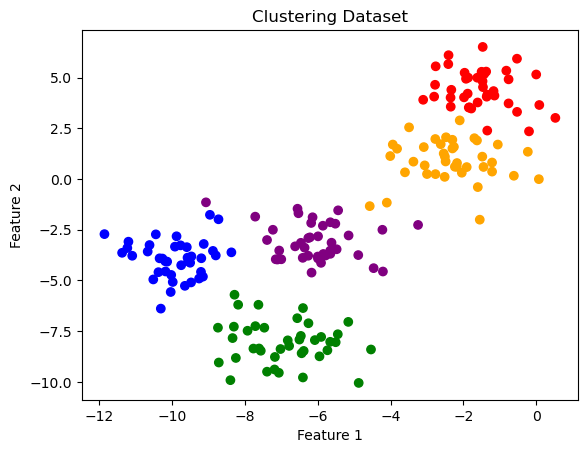

In [95]:
X, y = make_blobs(n_samples=200, centers=5, cluster_std=1, random_state=1)
colors = ['red', 'blue', 'green', 'purple', 'orange']
plt.scatter(X[:, 0], X[:, 1], c=[colors[i] for i in y], marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Dataset')
plt.show()

In [96]:
def single_linkage(A, B):
    minDist = float("inf")
    for a in A:
        for b in B:
            a, b = np.array(a), np.array(b)
            distance = np.linalg.norm(a-b)
            minDist = min(distance, minDist)
    return minDist

def complete_linkage(A, B):
    maxDist = -float("inf")
    for a in A:
        for b in B:
            a, b = np.array(a), np.array(b)
            distance = np.linalg.norm(a-b)
            maxDist = max(distance, maxDist)
    return maxDist

def average_linkage(A, B):
    distance = 0
    for a in A:
        for b in B:
            a, b = np.array(a), np.array(b)
            distance += np.linalg.norm(a-b)
    return distance / (len(A) * len(B))

In [108]:
cluster = HierarchicalClustering(5, single_linkage)
X_sl, y_sl = cluster.fit(X)

cluster = HierarchicalClustering(5, complete_linkage)
X_cl, y_cl = cluster.fit(X)

cluster = HierarchicalClustering(5, average_linkage)
X_al, y_al = cluster.fit(X)

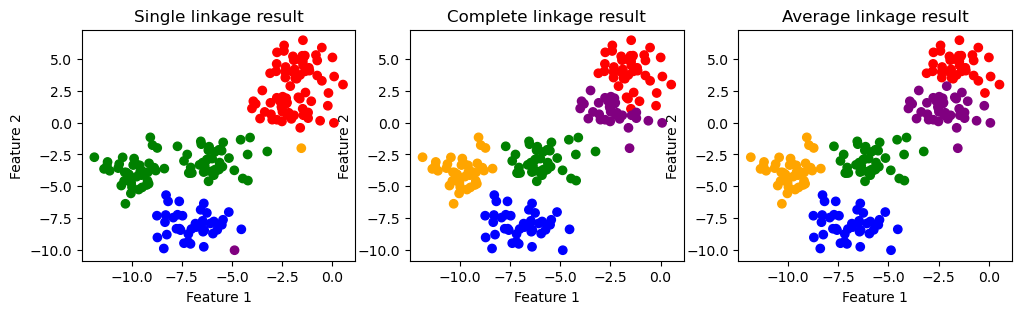

In [111]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))

ax[0].scatter(X_sl[:, 0], X_sl[:, 1], c=[colors[i] for i in y_sl], marker='o')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[0].set_title('Single linkage result')

ax[1].scatter(X_cl[:, 0], X_cl[:, 1], c=[colors[i] for i in y_cl], marker='o')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')
ax[1].set_title('Complete linkage result')

ax[2].scatter(X_al[:, 0], X_al[:, 1], c=[colors[i] for i in y_al], marker='o')
ax[2].set_xlabel('Feature 1')
ax[2].set_ylabel('Feature 2')
ax[2].set_title('Average linkage result')

plt.show()